In [1]:
def find_module(modulename, filename=None):
    """Finds a python module or package on the standard path.
       If a filename is specified, add its containing folder
       to the system path.
       Returns a string of the full path to the module/package."""
    import imp
    import sys
    import os
    full_path = []
    if filename:
        full_path.append(os.path.dirname(os.path.abspath(filename)))
    full_path += sys.path
    fname = imp.find_module(modulename, full_path)
    return fname[1]

In [2]:
find_module('pandas_profiling')

'/home/guilourenzo/anaconda3/lib/python3.7/site-packages/pandas_profiling'

----

In [1]:
import numpy as np
import pandas as pd

import visions.types as vt
from visions.application.summaries import CompleteSummary
from visions.functional import (
    cast_and_infer_frame,
    cast_frame,
    detect_frame_type,
    infer_frame_type,
)
from visions.typesets import CompleteSet

integer_series = pd.Series([1, 2, 3, 4, 5, -100000, np.nan], dtype="Int64")

summarizer = CompleteSummary()
summary = summarizer.summarize_series(integer_series, vt.Integer)

print(summary)

ImportError: cannot import name 'cast_and_infer_frame' from 'visions.functional' (C:\ProgramData\Anaconda3\lib\site-packages\visions\functional.py)

In [68]:
x = {}
for k, v in summary.items():
    if not isinstance(summary[k], dict):
        x[k] = v


t2 = pd.DataFrame(x, index=[0])
t2

,inf_count,mean,std,var,max,min,median,kurt,skew,sum,...,range,cv,monotonic_increase,monotonic_decrease,n_zeros,n_unique,n_records,memory_size,dtype,na_count
0,0,-16664.166667,40826.053816,1.666767e+09,5.0,-100000.0,2.5,6.0,-2.44949,-99985.0,...,100005.0,-2.449931,False,False,0,6,7,191,Int64,1


In [3]:
df = pd.read_csv('starbucks.csv')

In [5]:
covid = pd.read_csv('starbucks.csv', index_col='Date', parse_dates=True)

In [24]:
covid2 = covid.reindex(pd.date_range(start=covid.index.min(), end=covid.index.max()+timedelta(days=2), freq='D'))

In [25]:
covid2.tail(10)

,Close,Volume
2018-12-24,60.56,6323252.0
2018-12-25,NaN,NaN
2018-12-26,63.08,16646238.0
2018-12-27,63.20,11308081.0
2018-12-28,63.39,7712127.0
2018-12-29,NaN,NaN
2018-12-30,NaN,NaN
2018-12-31,64.40,7690183.0
2019-01-01,NaN,NaN
2019-01-02,NaN,NaN


In [16]:
x = covid.index.max()
x

<function Timestamp.timestamp>

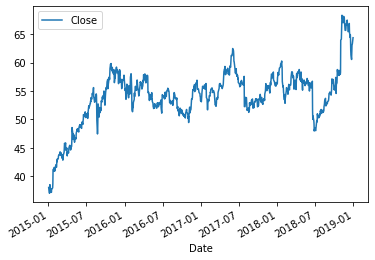

In [27]:
covid[['Close']].plot();

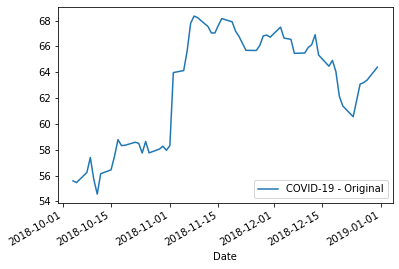

In [38]:
covid['Close'].iloc[-60:].plot(legend=True, label='COVID-19 - Original');

In [50]:
covid['Close'].iloc[-10:]

Date
2018-12-17    64.47
2018-12-18    64.92
2018-12-19    64.06
2018-12-20    62.15
2018-12-21    61.39
2018-12-24    60.56
2018-12-26    63.08
2018-12-27    63.20
2018-12-28    63.39
2018-12-31    64.40
Name: Close, dtype: float64

In [33]:
a = covid[['Close']]
a

,Close
Date,
2015-01-02,38.0061
2015-01-05,37.2781
2015-01-06,36.9748
2015-01-07,37.8848
2015-01-08,38.4961
...,...
2018-12-24,60.5600
2018-12-26,63.0800
2018-12-27,63.2000


In [34]:
c = covid['Close']
c

Date
2015-01-02    38.0061
2015-01-05    37.2781
2015-01-06    36.9748
2015-01-07    37.8848
2015-01-08    38.4961
               ...   
2018-12-24    60.5600
2018-12-26    63.0800
2018-12-27    63.2000
2018-12-28    63.3900
2018-12-31    64.4000
Name: Close, Length: 1006, dtype: float64

In [35]:
type(a)

pandas.core.frame.DataFrame

In [36]:
type(c)

pandas.core.series.Series

In [17]:
from datetime import timedelta

In [18]:
y = x + timedelta(days=2)

In [23]:
b = covid.index.max() + timedelta(days=2)
b

Timestamp('2019-01-02 00:00:00')

In [39]:
d = covid.index.max() - timedelta(days=60)
d

Timestamp('2018-11-01 00:00:00')

In [21]:
print(x)
print(y)

2018-12-31 00:00:00
2019-01-02 00:00:00


In [123]:
# Initialize the typeset
typeset = CompleteSet()

# Infer the column type
types = detect_frame_type(df, typeset)

# Generate a summary
summarizer = CompleteSummary()
summary = summarizer.summarize(df, types)

In [127]:
type(summary)

dict

In [128]:
x = {}
for k, v in summary.items():
    if not isinstance(summary[k], dict):
        x[k] = v


t2 = pd.DataFrame(summary)
t2

,types,series,frame
Unnamed: 0,Integer,"{'inf_count': 0, 'mean': 5882.0, 'std': 3396.4...",NaN
city,String,"{'n_unique': 7, 'length': [9, 9, 12, 12, 9, 9,...",NaN
area,Float,"{'inf_count': 0, 'mean': 145.65269102421493, '...",NaN
rooms,Float,"{'inf_count': 0, 'mean': 2.4964059558446006, '...",NaN
bathroom,Integer,"{'inf_count': 0, 'mean': 2.280407989800255, 's...",NaN
parking spaces,Float,"{'inf_count': 0, 'mean': 2.1817045454545454, '...",NaN
floor,String,"{'n_unique': 37, 'length': [1.0, 2.0, 1.0, 1.0...",NaN
hoa,Integer,"{'inf_count': 0, 'mean': 1162.632214194645, 's...",NaN
rent,Integer,"{'inf_count': 0, 'mean': 4033.429154271143, 's...",NaN
tax,String,"{'n_unique': 1227, 'length': [3, 4, 2, 2, 2, 3...",NaN


In [130]:
summary.keys()

dict_keys(['types', 'series', 'frame'])

----

In [1]:
from guietta import _, Gui, Quit

In [ ]:

gui = Gui(
	[ "Enter numbers:",  "__a__", "+", "__b__", ["Calculate"] ],
	[    "Result: -->", "result",   _,       _,             _ ],
	[                _,        _,   _,       _,          Quit ]
)

In [ ]:
with gui.Calculate:
	gui.result = float(gui.a) + float(gui.b)

In [ ]:
gui.run()